# Support Vector Machine Classification Modeling

In [19]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
#from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, roc_auc_score,\
recall_score, precision_score, average_precision_score, f1_score, classification_report,\
accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

## Read in the data

In [20]:
# read std data
df = pd.read_csv("hotel_bookings_dummy.csv")
df.head()

,adults,arrival_date_year,arrival_month,babies,booked_by_agent,booked_by_company,booking_changes,children,domestic,got_room_booked,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined
0,2,2015,7,0,0,0,3,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,2015,7,0,0,0,4,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2015,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,2015,7,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,2015,7,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Number of features
df.shape

(119388, 43)

## Splitting train and test

In [22]:
# get train indexes
train_ind = pd.read_csv("train_index.csv")

# split train
train = df.iloc[train_ind.Train_Index,:]
train.reset_index(inplace = True, drop = True)

# Split test 
test = df.iloc[df.index.difference(train_ind.Train_Index),:]

In [23]:
train.head(3)

,adults,arrival_date_year,arrival_month,babies,booked_by_agent,booked_by_company,booking_changes,children,domestic,got_room_booked,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined
0,2,2017,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,2016,5,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,2017,8,1,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Scale numeric columns 
scaler = StandardScaler()
scaler.fit(train.drop("is_canceled", axis = 1))

# Scale train data
xtrain = scaler.transform(train.drop("is_canceled", axis = 1))
ytrain = train.is_canceled

# Scale test data with train scaler 
xtest = scaler.transform(test.drop("is_canceled", axis = 1))
ytest = test.is_canceled

# Give everyone a header
dftrain = pd.DataFrame(xtrain)
dftrain.columns = train.drop("is_canceled", axis = 1).columns

In [25]:
dftrain.head(5)

,adults,arrival_date_year,arrival_month,babies,booked_by_agent,booked_by_company,booking_changes,children,domestic,got_room_booked,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0.255102,1.194999,-0.827079,-0.079146,0.397621,-0.246093,-0.339409,-0.259137,-0.827397,-2.645989,...,-0.214975,-0.343744,-0.445215,-0.506124,1.056154,-0.004576,-0.08367,2.698034,-0.313399,-0.098078
1,-1.514583,-0.220671,-0.503055,-0.079146,-2.514960,4.063508,-0.339409,-0.259137,1.208609,-2.645989,...,-0.214975,2.909140,-0.445215,-0.506124,-0.946831,-0.004576,-0.08367,-0.370640,-0.313399,-0.098078
2,0.255102,1.194999,0.469018,10.108578,0.397621,-0.246093,1.200680,2.254616,-0.827397,0.377931,...,-0.214975,-0.343744,-0.445215,-0.506124,1.056154,-0.004576,-0.08367,-0.370640,-0.313399,-0.098078
3,0.255102,-0.220671,-0.503055,-0.079146,-2.514960,-0.246093,-0.339409,-0.259137,1.208609,0.377931,...,-0.214975,2.909140,-0.445215,-0.506124,-0.946831,-0.004576,-0.08367,-0.370640,-0.313399,-0.098078
4,-1.514583,1.194999,-1.475128,-0.079146,-2.514960,-0.246093,-0.339409,-0.259137,1.208609,0.377931,...,-0.214975,2.909140,-0.445215,-0.506124,-0.946831,-0.004576,-0.08367,-0.370640,-0.313399,-0.098078


In [26]:
df.columns

Index(['adults', 'arrival_date_year', 'arrival_month', 'babies',
       'booked_by_agent', 'booked_by_company', 'booking_changes', 'children',
       'domestic', 'got_room_booked', 'hotel', 'is_canceled',
       'is_repeated_guest', 'log_adr', 'log_days_in_waiting_list',
       'log_lead_time', 'previous_bookings', 'previous_cancellations',
       'required_car_parking', 'total_nights', 'total_of_special_requests',
       'continent_Americas', 'continent_Antarctica', 'continent_Asia',
       'continent_Europe', 'continent_Oceania', 'continent_unknown',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined'],
     

In [27]:
df.nunique()

adults                             14
arrival_date_year                   3
arrival_month                      12
babies                              5
booked_by_agent                     2
booked_by_company                   2
booking_changes                    21
children                            5
domestic                            2
got_room_booked                     2
hotel                               2
is_canceled                         2
is_repeated_guest                   2
log_adr                          8877
log_days_in_waiting_list          128
log_lead_time                     479
previous_bookings                  77
previous_cancellations             15
required_car_parking                2
total_nights                       45
total_of_special_requests           6
continent_Americas                  2
continent_Antarctica                2
continent_Asia                      2
continent_Europe                    2
continent_Oceania                   2
continent_un

In [28]:
num_cols = ['adults', 'arrival_date_year', 'arrival_month', 
            'babies', 'booking_changes', 'children', 'log_adr',
            'log_days_in_waiting_list', 'log_lead_time',
            'previous_bookings', 'previous_cancellations', 'total_nights',
            'total_of_special_requests']

## Code to fit a SVC Model using sklearn

In [29]:
import warnings
warnings.filterwarnings('ignore')

## Tune Hyper-parameters for SVM using 10-fold cross-validation

In [30]:
# Define the range of hyperparameters to test
X_train = pd.DataFrame(xtrain)
y_train = pd.DataFrame(ytrain)

In [14]:
# Define the range of hyperparameters to test
X_train = pd.DataFrame(xtrain)
y_train = pd.DataFrame(ytrain)

param_grid = {
    'C': [0.01, 0.1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1],
    'class_weight': ['balanced', None]
}

# Create an SVM classifier
svm = SVC(max_iter=500, tol=1e-4)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("The best hyperparameters are: ")
print(grid_search.best_params_)

The best hyperparameters are: 
{'C': 0.1, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}


In [15]:
# After I picked the best hyper-parameters, seems like I should fit the entire training

## Fit best model

In [31]:
# Set the best hyperparameters found from cross-validation
best_hyperparameters = {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'class_weight': None}

# Create an SVM classifier with the best hyperparameters
svm = SVC(**best_hyperparameters, max_iter=5000, tol=1e-4)

# Fit model with training data
start = time.time()
# Fit the classifier to the training data
svm.fit(X_train, y_train)
end = time.time()
time_svm = end - start
print('SVM training took', time_svm, 'second')

SVM training took 59.421512842178345 second


In [32]:
# Get yhat using test data
yhat_test = svm.predict(xtest)

In [33]:
# Get test accuracy
accuracy_score(ytest, yhat_test)

0.5641412237718306

In [34]:
# Get test Confusion Matrix
confusion_matrix(ytest, yhat_test)

array([[5457, 9592],
       [ 815, 8013]])

In [35]:
# Get test F-1 Score
f1_score(ytest, yhat_test)

0.6062875950516399

In [36]:
# Get test AUC Score
roc_auc_score(ytest, yhat_test)

0.6351477824606964

## Model interpretation

In [37]:
from alepython import ale_plot

In [38]:
num_cols = ['adults', 'arrival_date_year', 'arrival_month', 
            'babies', 'booking_changes', 'children', 'log_adr',
            'log_days_in_waiting_list', 'log_lead_time',
            'previous_bookings', 'previous_cancellations', 'total_nights',
            'total_of_special_requests']

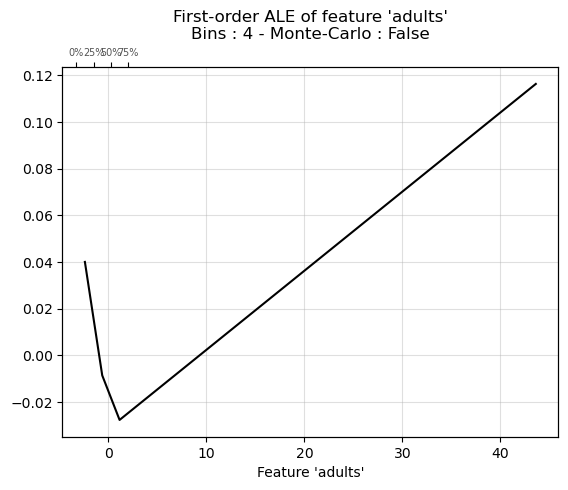

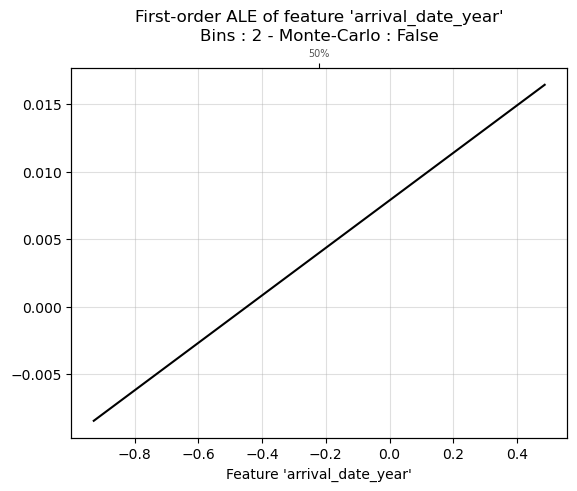

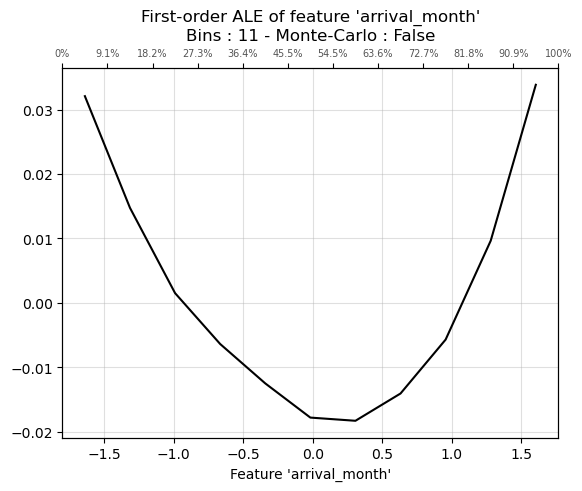

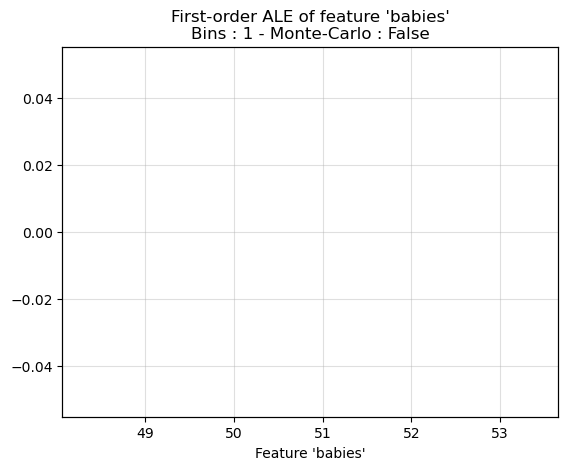

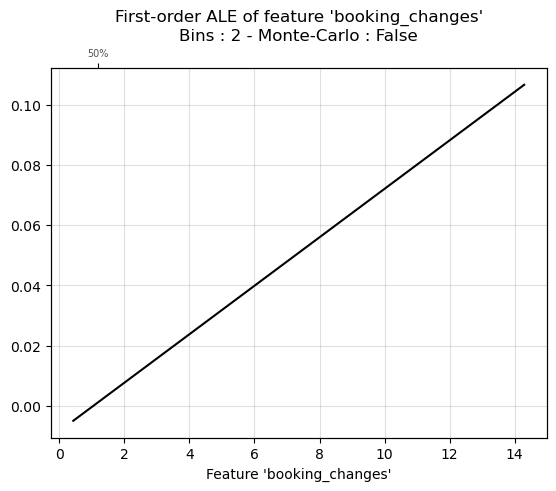

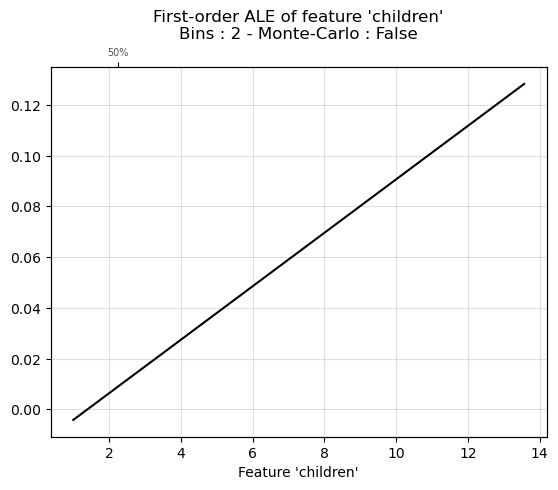

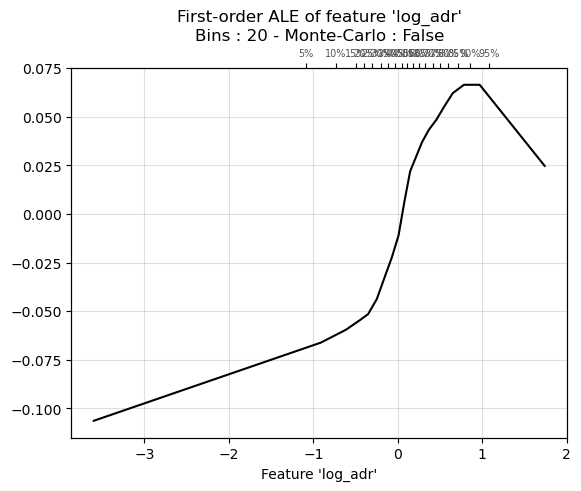

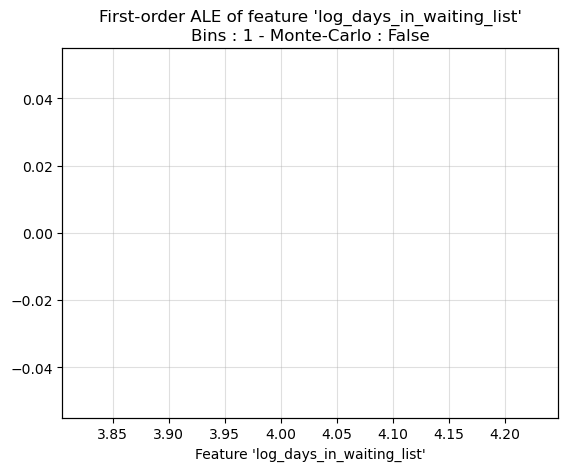

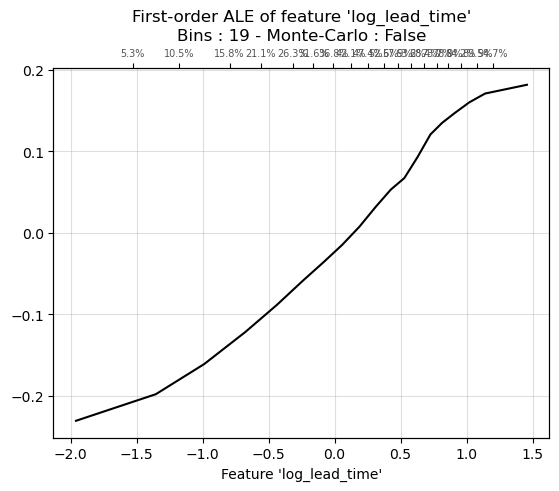

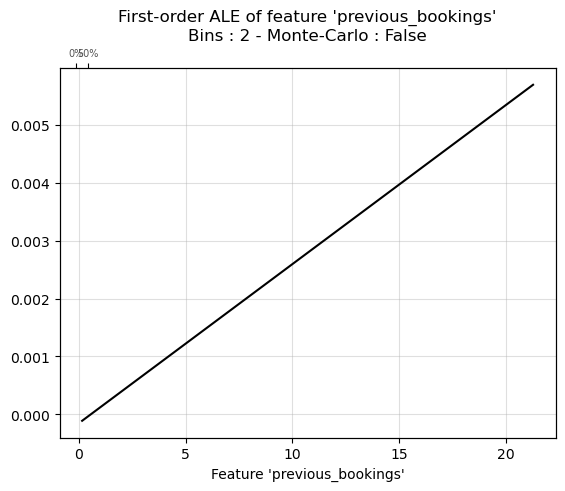

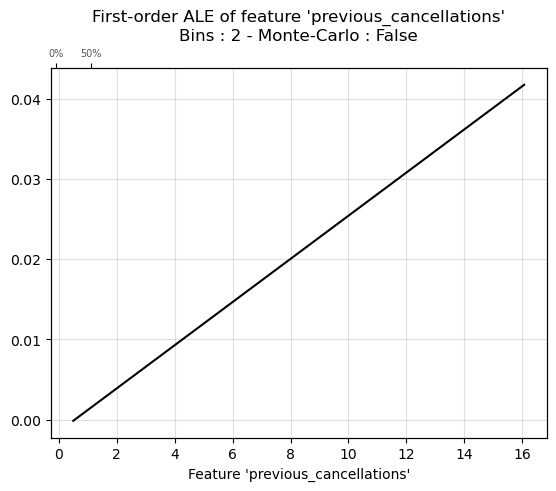

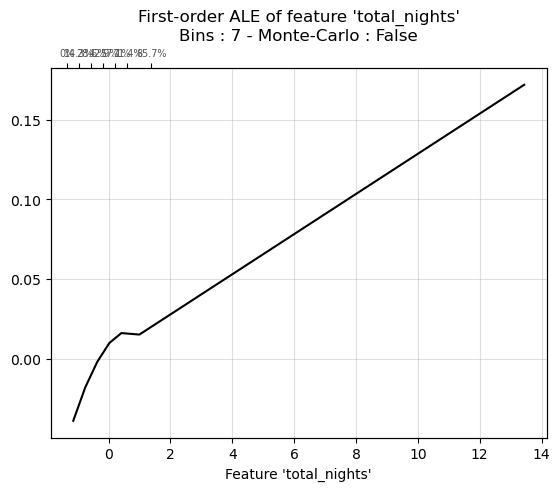

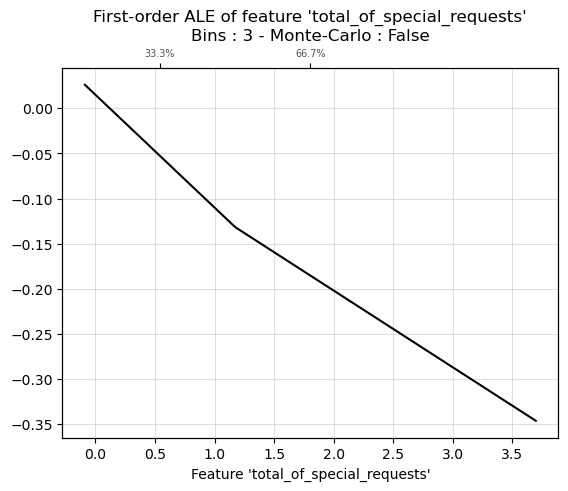

In [39]:
for col in num_cols:
    ale_plot(svm, dftrain, col, bins=20)

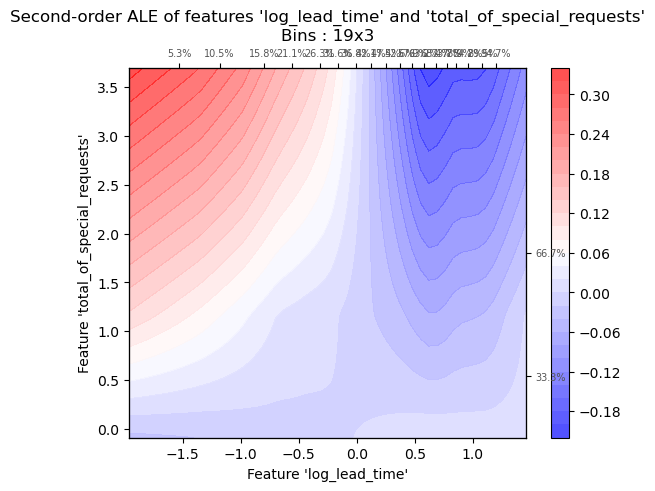

<AxesSubplot:title={'center':"Second-order ALE of features 'log_lead_time' and 'total_of_special_requests'\nBins : 19x3"}, xlabel="Feature 'log_lead_time'", ylabel="Feature 'total_of_special_requests'">

In [40]:
ale_plot(svm, dftrain, ['log_lead_time','total_of_special_requests'], bins=20)

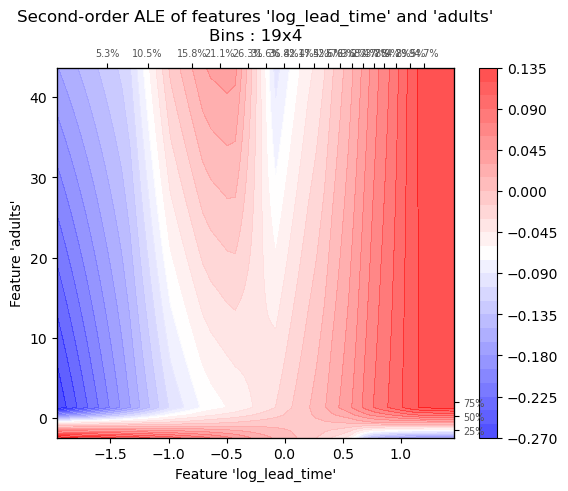

<AxesSubplot:title={'center':"Second-order ALE of features 'log_lead_time' and 'adults'\nBins : 19x4"}, xlabel="Feature 'log_lead_time'", ylabel="Feature 'adults'">

In [41]:
ale_plot(svm, dftrain, ['log_lead_time','adults'], bins=20)

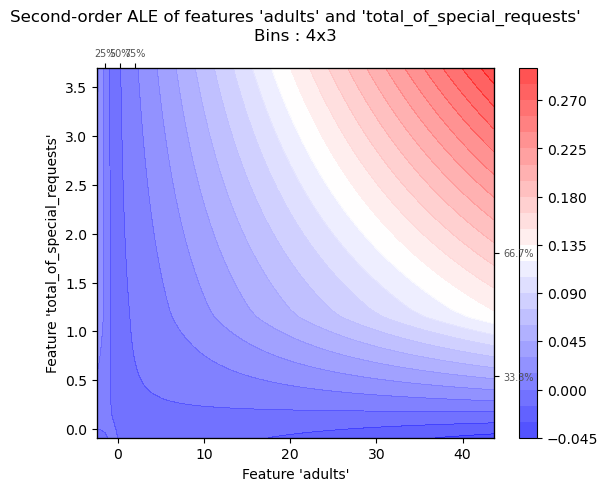

<AxesSubplot:title={'center':"Second-order ALE of features 'adults' and 'total_of_special_requests'\nBins : 4x3"}, xlabel="Feature 'adults'", ylabel="Feature 'total_of_special_requests'">

In [42]:
ale_plot(svm, dftrain, ['adults','total_of_special_requests'], bins=20)